<a href="https://colab.research.google.com/github/LisaHoek/TxMM-PawpularityContest/blob/main/TxMM_TabularFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TxMM Project - Pawpularity Contest
## Part I Analysis metafeatures PetFinder.my
Author: Lisa Hoek, contact at lisa.hoek@ru.nl

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [2]:
colors = ["#7783de","#6cca4f","#b96ade","#ccd652","#e34db1","#7fde9f","#de606c",
"#82cac4","#e36936","#729cbf","#c89c43","#cea9db","#72985a","#c57c9a","#c7a98c"]

In [3]:
features = ['Subject Focus',	'Eyes',	'Face',	'Near',	'Action',	'Accessory',	'Group',	'Collage', 'Human',	'Occlusion',	'Info',	'Blur']
train = pd.read_csv('/content/drive/MyDrive/TxMM/petfinder-pawpularity-score/train.csv')

In [4]:
display(train)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


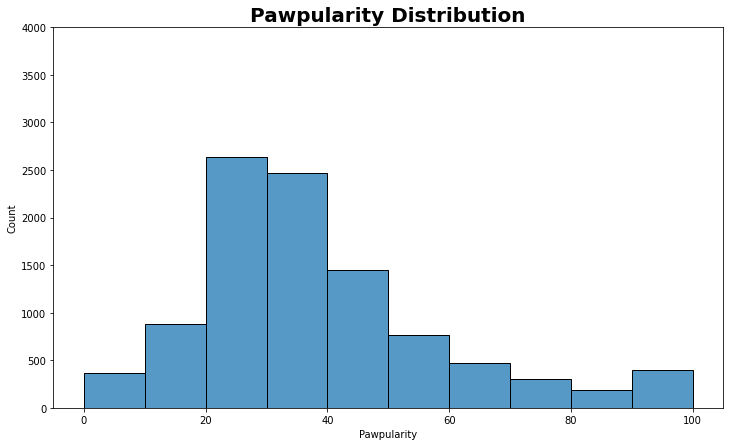

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.histplot(x='Pawpularity', data=train, ax=ax, bins=[0,10,20,30,40,50,60,70,80,90,100])
ax.set_title('Pawpularity Distribution', fontsize=20, fontweight='bold')
ax.set_ylim(0, 4000)
plt.show()

In [6]:
train.mean()*100

Subject Focus       2.764326
Eyes               77.259887
Face               90.395480
Near               86.158192
Action              0.998789
Accessory           6.779661
Group              12.933818
Collage             4.963680
Human              16.626312
Occlusion          17.201372
Info                6.123890
Blur                7.041969
Pawpularity      3803.904358
dtype: float64

In [7]:
train.groupby(['Pawpularity']).mean()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
Pawpularity,,,,,,,,,,,,
1,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000
2,0.051948,0.688312,0.896104,0.870130,0.025974,0.038961,0.155844,0.012987,0.168831,0.181818,0.051948,0.090909
3,0.022222,0.777778,0.922222,0.855556,0.000000,0.044444,0.188889,0.055556,0.200000,0.188889,0.055556,0.055556
4,0.000000,0.722222,0.861111,0.833333,0.055556,0.055556,0.166667,0.083333,0.222222,0.166667,0.138889,0.055556
5,0.029412,0.735294,0.970588,0.911765,0.000000,0.029412,0.205882,0.088235,0.117647,0.088235,0.058824,0.088235
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.333333,0.750000,0.833333,0.166667,0.083333,0.083333,0.000000,0.000000,0.166667,0.083333,0.166667
97,0.125000,0.750000,0.875000,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
98,0.000000,0.700000,0.900000,1.000000,0.100000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.100000


In [8]:
for f in features:
  corr, _ = pearsonr(train.index, train[f])
  stest = ttest_ind(train.index, train[f])
  print(f, "%.3f" % corr)
  print("p-value: %.3f" % stest.pvalue)

Subject Focus -0.009
p-value: 0.000
Eyes 0.006
p-value: 0.000
Face 0.002
p-value: 0.000
Near -0.002
p-value: 0.000
Action -0.015
p-value: 0.000
Accessory -0.018
p-value: 0.000
Group 0.011
p-value: 0.000
Collage -0.007
p-value: 0.000
Human -0.005
p-value: 0.000
Occlusion 0.002
p-value: 0.000
Info -0.015
p-value: 0.000
Blur 0.003
p-value: 0.000


In [9]:
def meta_feature_dist(feature, color, ymax):
    fig, ax = plt.subplots(1,1,figsize=(12, 5))
    data = train[[feature, 'Pawpularity']].groupby(['Pawpularity']).mean()
    plt.bar(data.index, data[feature].apply(lambda x: x*100), label=feature, color=color, align='edge', width=1, edgecolor='black')
    plt.xlabel('Pawpularity')
    plt.ylabel('% feature found')
    plt.axis([1, 100, 0, ymax])
    plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
    plt.yticks()
    plt.rc('font', size=20)
    plt.legend(loc='upper right')
    plt.show()

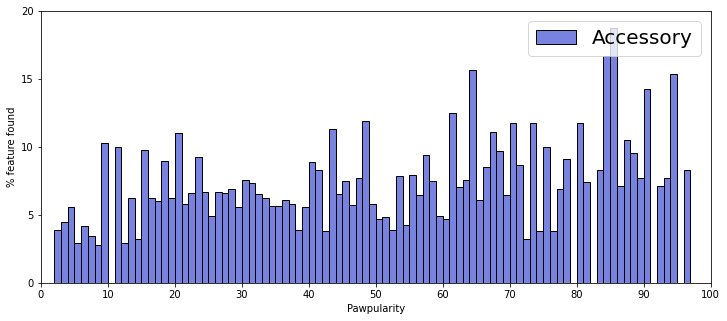

In [10]:
meta_feature_dist('Accessory', colors[0], 20)

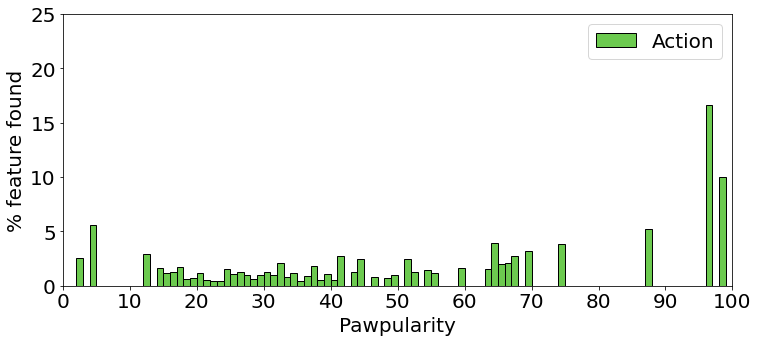

In [11]:
meta_feature_dist('Action', colors[1], 25)

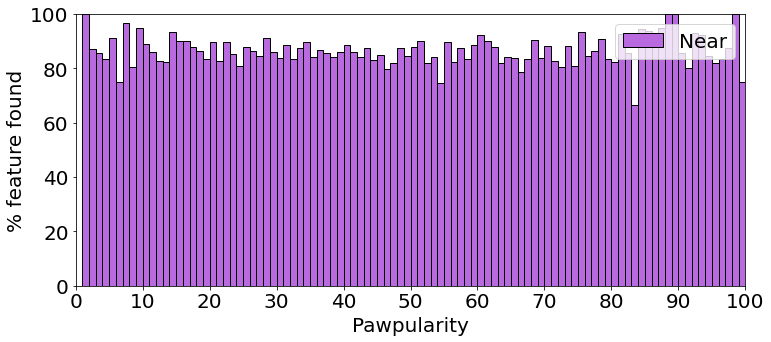

In [12]:
meta_feature_dist('Near', colors[2], 100)

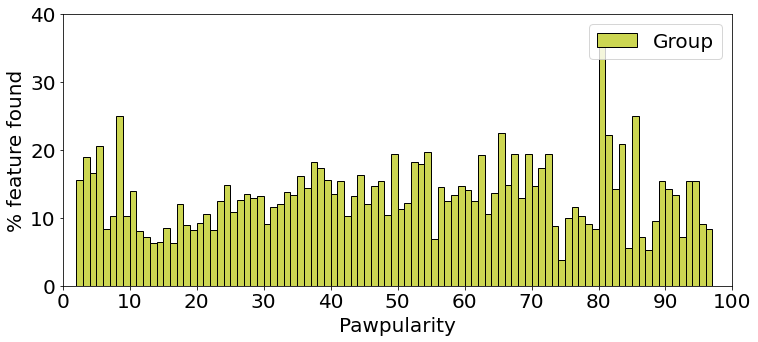

In [13]:
meta_feature_dist('Group', colors[3], 40)

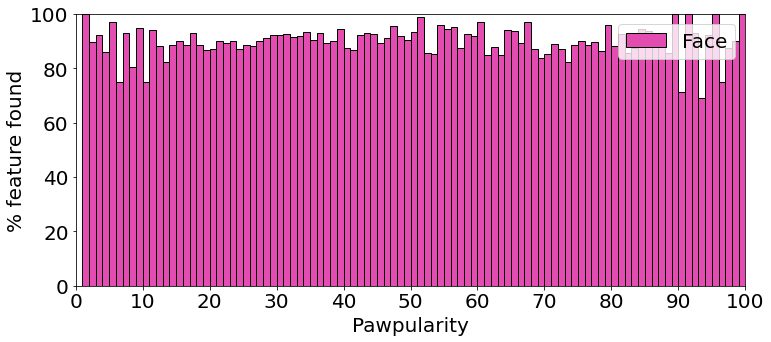

In [14]:
meta_feature_dist('Face', colors[4], 100)

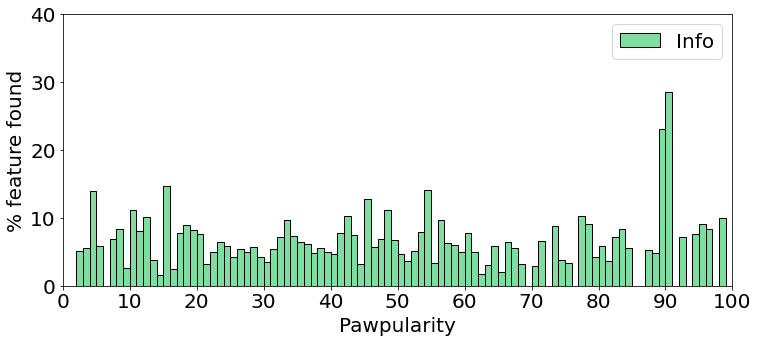

In [15]:
meta_feature_dist('Info', colors[5], 40)

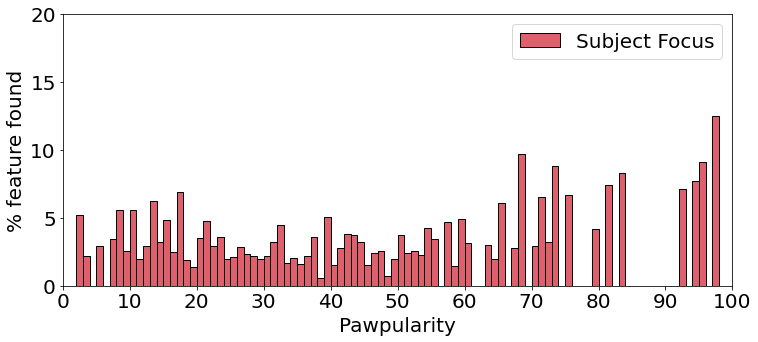

In [16]:
meta_feature_dist('Subject Focus', colors[6], 20)

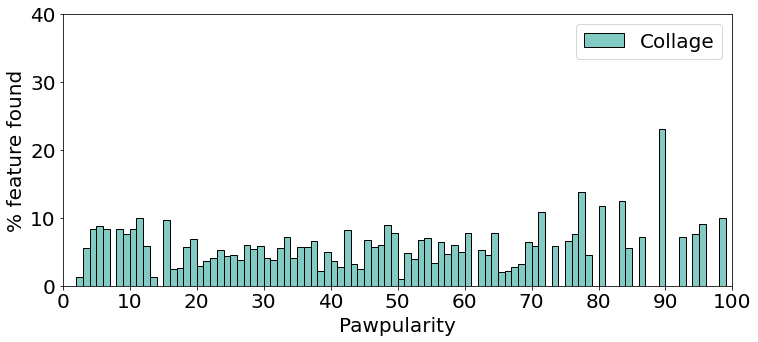

In [17]:
meta_feature_dist('Collage', colors[7], 40)

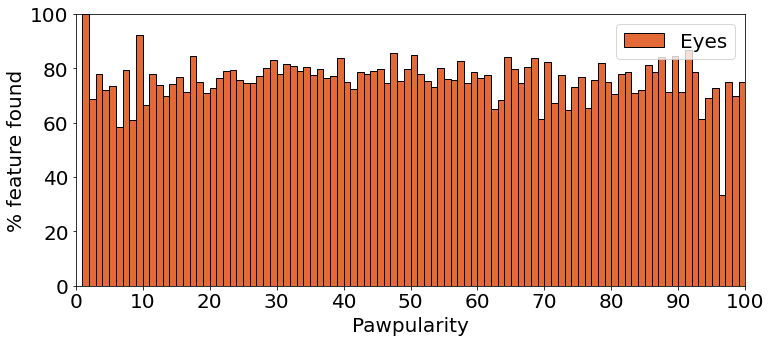

In [18]:
meta_feature_dist('Eyes', colors[8], 100)

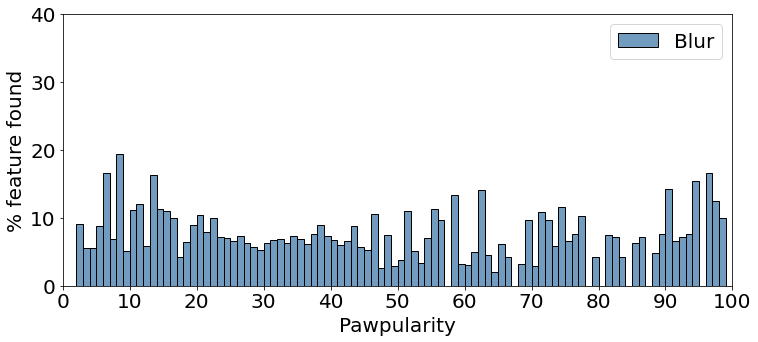

In [19]:
meta_feature_dist('Blur', colors[9], 40)

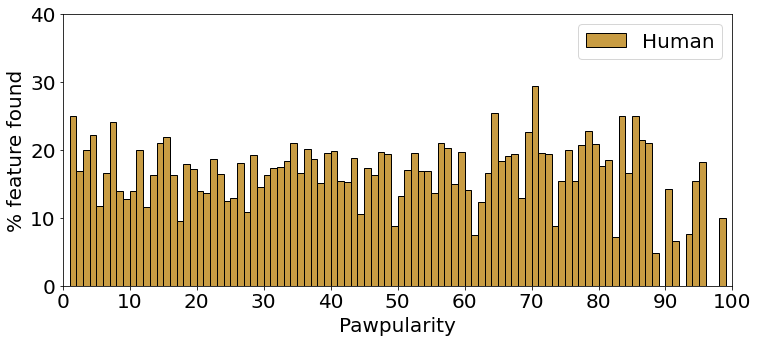

In [20]:
meta_feature_dist('Human', colors[10], 40)

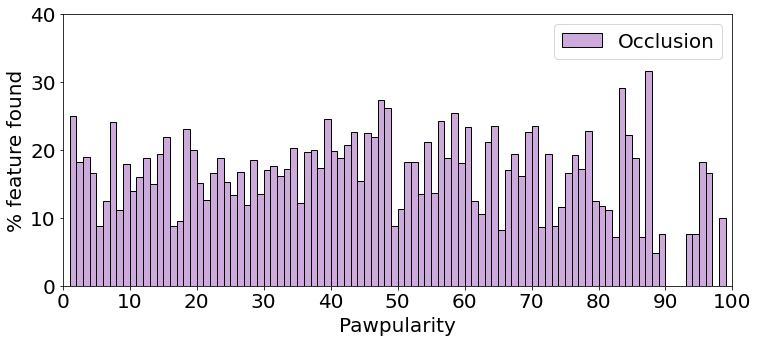

In [21]:
meta_feature_dist('Occlusion', colors[11], 40)